In [2]:
your_path = "/content/drive/MyDrive/ClassRoom/Pytorch13/imgs"

from google.colab import drive # 구글 colab과 google drive연결 시키는 코드
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


type : <class 'PIL.JpegImagePlugin.JpegImageFile'>
size of image (width, height = (1280, 853)


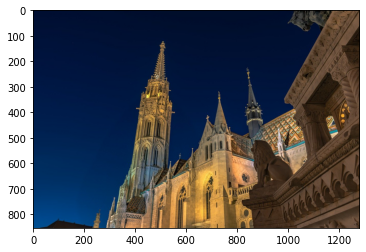

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/content/drive/MyDrive/ClassRoom/Pytorch13/imgs/budapest.jpg")

print(f"type : {type(img)}")

# 이미지 크기 조회 : (width, height)
print(f"size of image (width, height = {img.size}")

plt.imshow(img)
plt.show()

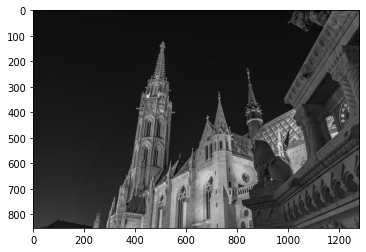

In [4]:
gray_img = img.convert("LA")
plt.imshow(gray_img)
plt.show()

# Y' = 0.2989 R + 0.5870 G + 0.01140 B

 이미지의 사이즈 (width, height) = (720, 480)


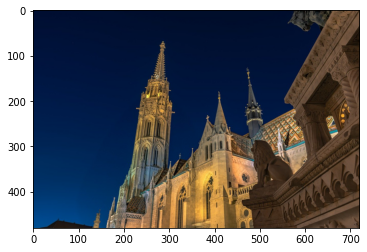

In [5]:
resized_img = img.resize((720, 480))

print(f" 이미지의 사이즈 (width, height) = {resized_img.size}")

plt.imshow(resized_img)
plt.show()

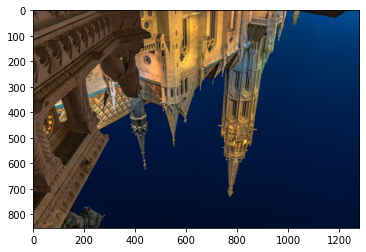

In [7]:
rotated_img = img.rotate(180)

plt.imshow(rotated_img)
plt.show()

이미지의 사이즈 (width, height) =(200, 300)


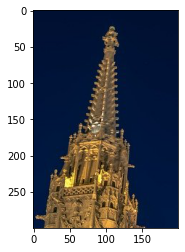

In [9]:
# Left (width, height), Right (width, height)

cropped_img = img.crop((400, 100, 600, 400))

print(f"이미지의 사이즈 (width, height) ={cropped_img.size}")
plt.imshow(cropped_img)
plt.show()

In [14]:
import torch
import numpy as np

img_array = np.array(img)

print(" --- original image size ---")
print(f"size of image (height, width, channel) = {img_array.shape}")
print(" --- after reshape, image size ---")

# reshape: H, W, C --> C, H, W permute유사
transposed_img_array = img_array.transpose(2, 0, 1)
print(f"size of image (channel, height, width) = {transposed_img_array.shape}")

 --- original image size ---
size of image (height, width, channel) = (853, 1280, 3)
 --- after reshape, image size ---
size of image (channel, height, width) = (3, 853, 1280)


In [15]:
img_torch = torch.tensor(img_array)
img_torch.size()

torch.Size([853, 1280, 3])

In [21]:
img_array.shape

(853, 1280, 3)

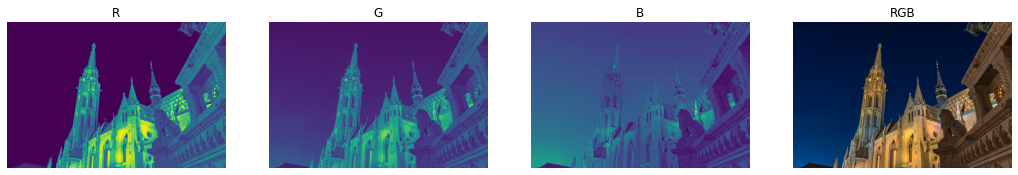

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(18, 9))
for i, (ax, t) in enumerate(zip(axes, ["R", "G", "B", "RGB"])):
    if i == 3:
        ax.imshow(img_array)
        ax.axis("off")
        ax.set_title(t)
    else:
        ax.imshow(img_array[:, :, i])
        ax.axis("off")
        ax.set_title(t)